In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas
import pymc3
import seaborn as sns

In [26]:
alpha = abs(np.random.uniform(0, 10))
print(alpha)

7.232455705484091


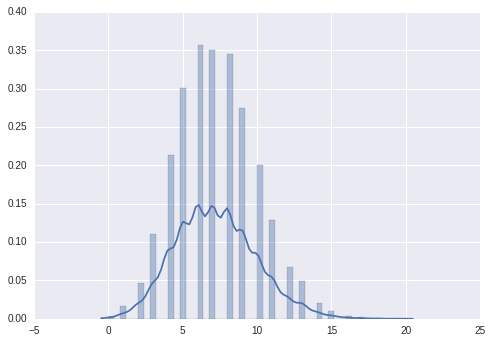

In [27]:
data = np.random.poisson(alpha, size=10000)
sns.distplot(data)

In [28]:
mdl = pymc3.Model()
with mdl:
    alpha = pymc3.HalfNormal('alpha', 10)
    beta = pymc3.Uniform('beta', 0, 10)
    observed = pymc3.NegativeBinomial('obs', beta, alpha, observed=data)
    

Applied log-transform to alpha and added transformed alpha_log to model.
Applied interval-transform to beta and added transformed beta_interval to model.


 [-----------------100%-----------------] 1000 of 1000 complete in 15.4 sec

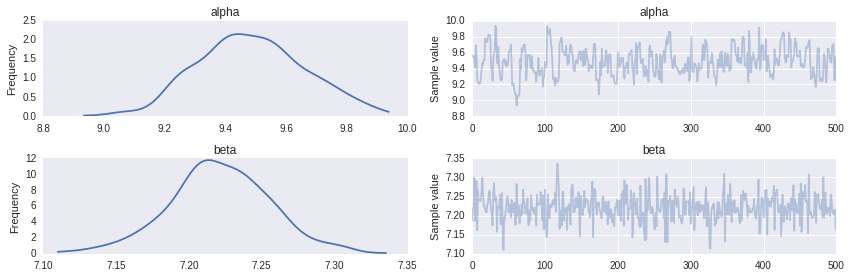

In [29]:
with mdl:
    trace = pymc3.sample(1000, step=pymc3.NUTS())
    pymc3.traceplot(trace[-500:])

In [30]:
pymc3.trace_to_dataframe(trace[-500:]).beta.mean()

7.2211697207884171

In [ ]:
pymc3.sample_pp